In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from s4hci.utils.data_handling import load_adi_data, save_as_fits
from s4hci.models.psf_subtraction import S4

# All the files we need

In [2]:
dataset_hdf5_file = "/fast/mbonse/s4/30_data/HD22049_304_199_C-0065_C_.hdf5"
s4_work_dir = "/fast/mbonse/s4/70_results/05_understand_fine_tuning/03_debug_new_model/"

# Load the data

In [3]:
science_data, raw_angles, raw_psf_template_data = \
    load_adi_data(
        hdf5_dataset=dataset_hdf5_file,
        data_tag="object",
        psf_template_tag="psf_template",
        para_tag="header_object/PARANG")

science_data = science_data[:, 32:-32, 32:-32]

# Background subtraction of the PSF template
psf_template_data = np.median(raw_psf_template_data, axis=0)
psf_template_data = psf_template_data - np.min(psf_template_data)

In [4]:
science_data.shape

(57561, 77, 77)

# Create a model

In [5]:
s4_model = S4(
    science_data=science_data,
    parang=raw_angles,
    psf_template=psf_template_data,
    noise_cut_radius_psf=4.0,
    noise_mask_radius=5.5,
    device=0,
    noise_lambda_init=1644.68,
    noise_normalization="normal",
    planet_convolve_second=True,
    planet_use_up_sample=1,
    work_dir=s4_work_dir,
    verbose=True)

# Test lambda validation

In [11]:
lambdas = np.logspace(1, 8, 200)
validation_results, _ = s4_model.validate_lambdas_noise(
    num_separations=10,
    lambdas=lambdas,
    num_test_positions=5,
    test_size=0.3,
    approx_svd=5000)

Compute validation positions for separation 3.4545454545454546 ...
Compute betas for separation 3.4545454545454546 ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:24<00:00,  4.97s/it]


Re-mask betas for separation 3.4545454545454546 ...
Compute validation errors for separation 3.4545454545454546 ...
Compute validation positions for separation 6.909090909090909 ...
Compute betas for separation 6.909090909090909 ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.48s/it]


Re-mask betas for separation 6.909090909090909 ...
Compute validation errors for separation 6.909090909090909 ...
Compute validation positions for separation 10.363636363636363 ...
Compute betas for separation 10.363636363636363 ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.51s/it]


Re-mask betas for separation 10.363636363636363 ...
Compute validation errors for separation 10.363636363636363 ...
Compute validation positions for separation 13.818181818181818 ...
Compute betas for separation 13.818181818181818 ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.47s/it]


Re-mask betas for separation 13.818181818181818 ...
Compute validation errors for separation 13.818181818181818 ...
Compute validation positions for separation 17.272727272727273 ...
Compute betas for separation 17.272727272727273 ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.49s/it]


Re-mask betas for separation 17.272727272727273 ...
Compute validation errors for separation 17.272727272727273 ...
Compute validation positions for separation 20.727272727272727 ...
Compute betas for separation 20.727272727272727 ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.51s/it]


Re-mask betas for separation 20.727272727272727 ...
Compute validation errors for separation 20.727272727272727 ...
Compute validation positions for separation 24.181818181818183 ...
Compute betas for separation 24.181818181818183 ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.45s/it]


Re-mask betas for separation 24.181818181818183 ...
Compute validation errors for separation 24.181818181818183 ...
Compute validation positions for separation 27.636363636363637 ...
Compute betas for separation 27.636363636363637 ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.40s/it]


Re-mask betas for separation 27.636363636363637 ...
Compute validation errors for separation 27.636363636363637 ...
Compute validation positions for separation 31.09090909090909 ...
Compute betas for separation 31.09090909090909 ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.46s/it]


Re-mask betas for separation 31.09090909090909 ...
Compute validation errors for separation 31.09090909090909 ...
Compute validation positions for separation 34.54545454545455 ...
Compute betas for separation 34.54545454545455 ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.54s/it]


Re-mask betas for separation 34.54545454545455 ...
Compute validation errors for separation 34.54545454545455 ...
Recommended Lambda = 1644.68
Make sure to check if the tested range of lambda values is covering the global minimum!


(10.0, 100000000.0)

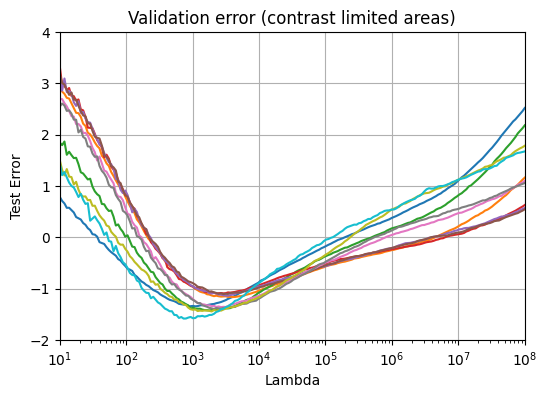

In [13]:
merged_results = np.array([i for i in validation_results.values()])

fig, (ax1) = plt.subplots(1, 1, figsize=(6, 4))

ax1.plot(lambdas, np.array(merged_results).T)
ax1.set_title("Validation error (contrast limited areas)")
ax1.set_xlabel("Lambda")
ax1.set_ylabel("Test Error")
ax1.set_xscale("log")
ax1.grid()
ax1.set_ylim(-2, 4)
ax1.set_xlim(1e1, 1e8)

# Test closed form solution

In [6]:
s4_model.find_closed_form_noise_model(
    fp_precision="float32")

S4 model: finding closed form noise model ... S4 Noise: fitting noise model ... Fitting ... 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5929/5929 [06:43<00:00, 14.68it/s]


[DONE]
[DONE]
[DONE]


In [7]:
s4_model.save_noise_model("noise_model_raw.pkl")
s4_model.save_normalization_model("normalization_model.pkl")

S4 model: saving noise model ... S4 Noise: saving noise model ... [DONE]
[DONE]
S4 model: saving normalization model ... [DONE]


In [7]:
s4_model.restore_models(
    file_noise_model="/fast/mbonse/s4/70_results/05_understand_fine_tuning/"\
        "03_debug_new_model/models/noise_model_raw.pkl",
    file_normalization_model="/fast/mbonse/s4/70_results/05_understand_fine_tuning/"\
        "03_debug_new_model/models/normalization_model.pkl",
    verbose=True)

S4 model: restoring models ... [DONE]


In [8]:
residual_image = s4_model.compute_residual(
    account_for_planet_model=False,
    combine='mean')

S4 model: computing residual ... [DONE]


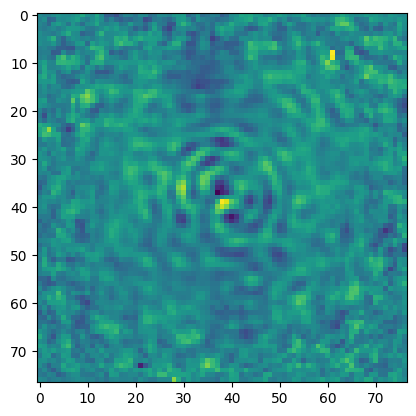

In [9]:
plt.imshow(residual_image)

# Test fine-tuning of the noise model

In [10]:
s4_model.fine_tune_noise_model(
    num_epochs=200,
    learning_rate=1e-6,
    batch_size=-1)

S4 model: fine tuning noise model ... 

  0%|          | 0/200 [00:00<?, ?it/s]

[DONE]


In [12]:
s4_model.save_noise_model("noise_model_fine_tuned.pkl")

In [11]:
residual_image = s4_model.compute_residual(
    account_for_planet_model=False,
    combine='mean')

S4 model: computing residual ... [DONE]


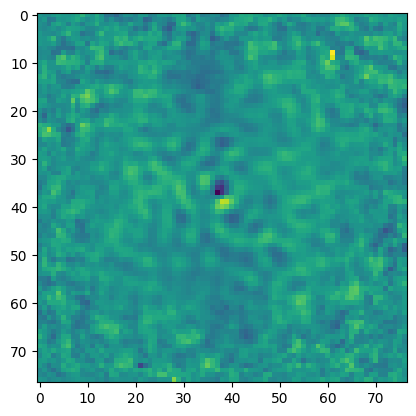

In [12]:
plt.imshow(residual_image)

# Test fine-tuning planet only

In [6]:
s4_model.restore_models(
    file_noise_model="/fast/mbonse/s4/70_results/05_understand_fine_tuning/"\
        "03_debug_new_model/models/noise_model_fine_tuned.pkl",
    file_normalization_model="/fast/mbonse/s4/70_results/05_understand_fine_tuning/"\
        "03_debug_new_model/models/normalization_model.pkl",
    verbose=True)

Creating right reason mask ... [DONE]


In [ ]:
s4_model.learn_planet_model(
    num_epochs=100,
    learning_rate_planet=0.001,
    learning_rate_noise=1e-06,
    fine_tune_noise_model=False,
    rotation_grid_down_sample=10,
    upload_rotation_grid=True,
    logging_interval=10,
    batch_size=-1)

S4 model: learning planet model ... 

  0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
s4_model.save_planet_model("planet_model_v1.pkl")

In [ ]:
residual_image = s4_model.compute_residual(
    account_for_planet_model=True,
    combine='mean')

In [ ]:
plt.imshow(residual_image)

# Test fine-tuning planet + noise

In [6]:
s4_model.restore_models(
    file_noise_model="/fast/mbonse/s4/70_results/05_understand_fine_tuning/"\
        "03_debug_new_model/models/noise_model_fine_tuned.pkl",
    file_normalization_model="/fast/mbonse/s4/70_results/05_understand_fine_tuning/"\
        "03_debug_new_model/models/normalization_model.pkl",
    verbose=True)

Creating right reason mask ... [DONE]


In [ ]:
s4_model.learn_planet_model(
    num_epochs=100,
    learning_rate_planet=0.001,
    learning_rate_noise=1e-06,
    fine_tune_noise_model=True,
    rotation_grid_down_sample=10,
    upload_rotation_grid=True,
    logging_interval=10,
    batch_size=-1)

In [8]:
s4_model.save_planet_model("planet_model_v2.pkl")
s4_model.save_noise_model("noise_model_fine_tuned_with_planet.pkl")

In [ ]:
residual_image = s4_model.compute_residual(
    account_for_planet_model=False,
    combine='mean')

In [ ]:
plt.imshow(residual_image)

In [ ]:
residual_image = s4_model.compute_residual(
    account_for_planet_model=True,
    combine='mean')

In [ ]:
plt.imshow(residual_image)